<a href="https://github.com/conorosully/medium-articles/blob/master/src/interpretable%20ml/PDPs%20and%20ICE%20Plots/PDP_ICE.ipynb">Source</a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import accuracy_score, confusion_matrix

import xgboost as xgb

In [5]:
dataset = pd.read_csv("PDP_ICE.csv", sep="\t")

y = dataset['price']
X = dataset.drop('price', axis=1)

print(dataset.shape)
dataset.head()

(1000, 6)


,owner_age,car_age,km_driven,repairs,car_type,price
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053


In [6]:
model = RandomForestRegressor(max_depth=4, n_estimators=100, random_state=0)
model.fit(X, y)

preds = model.predict(X)

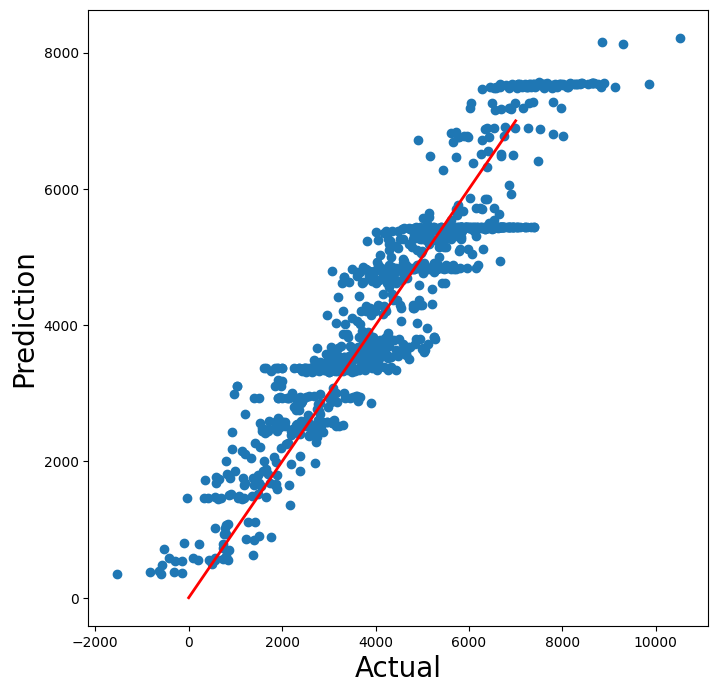

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(y, preds)
plt.plot([0, 7_000], [0, 7_000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Prediction', size=20)
plt.xlabel('Actual', size=20)

plt.show()

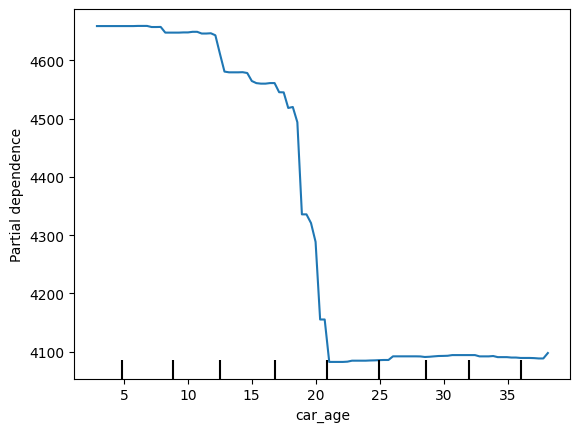

In [9]:
features = ['car_age']
PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()

### ICE Plot

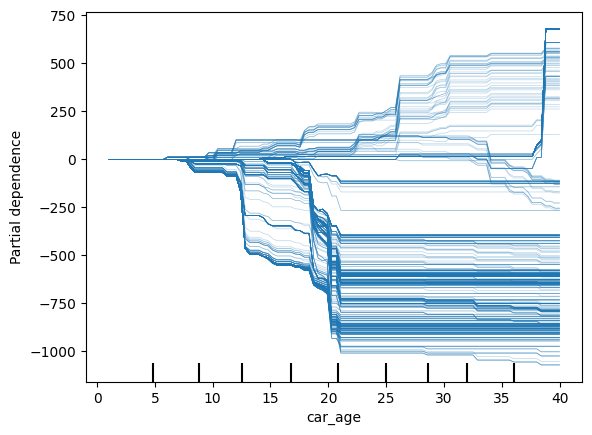

In [10]:
PartialDependenceDisplay.from_estimator(
    model,
    X,
    features,
    kind='individual',  # don't take average, show all lines (ICE plot)
    percentiles=(0,1),
    centered=True,
)
plt.show()

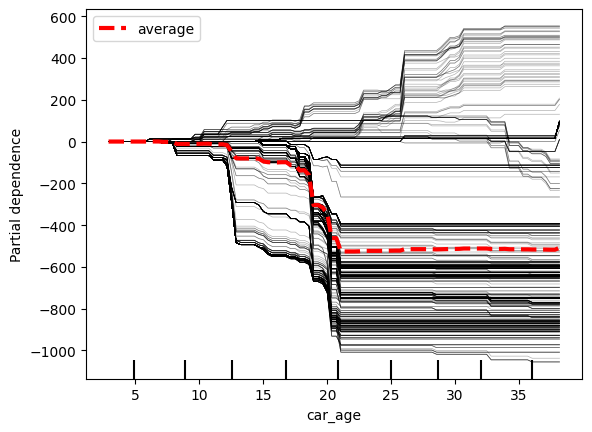

In [11]:
PartialDependenceDisplay.from_estimator(
    model,
    X,
    features,
    kind='both',  # show PDP line also
    centered=True,
    ice_lines_kw={'color':'black'},
    pd_line_kw={'color':'red', 'lw': 3, 'linestyle':'--'},
)
plt.show()

### Multiple Variables

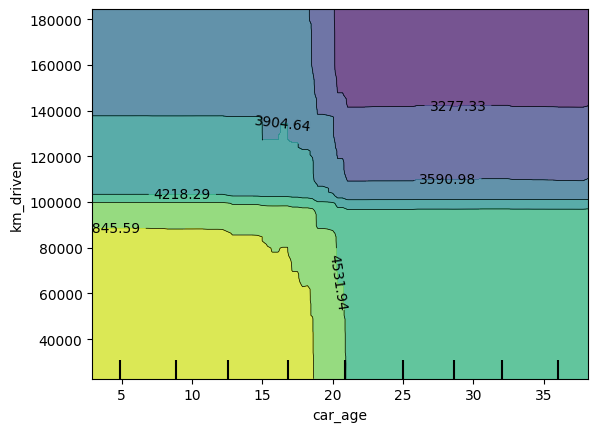

In [12]:
features = [('car_age', 'km_driven')]
PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()

### Categorical Variable

c:\Users\PMLS\Desktop\code\py\XAI\.venv\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 4 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


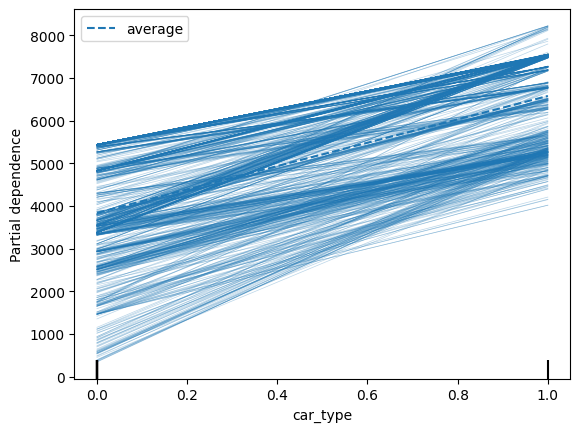

In [14]:
features = ["car_type"]
PartialDependenceDisplay.from_estimator(model, X, features, kind="both")
plt.show()

c:\Users\PMLS\Desktop\code\py\XAI\.venv\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 'car_type' contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


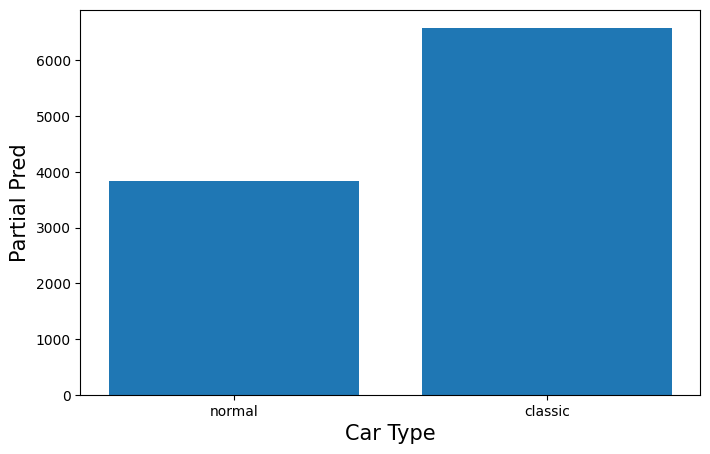

In [16]:
pdp_ice = partial_dependence(model, X, features, kind='both')
pdp = pdp_ice['average'][0]

plt.figure(figsize=(8,5))
labels = ['normal', 'classic']
x = np.arange(len(labels))

plt.bar(x, height=pdp)

plt.ylabel('Partial Pred', size=15)
plt.xlabel('Car Type', size=15)
plt.xticks(x, labels)

plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_82692\2742230760.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


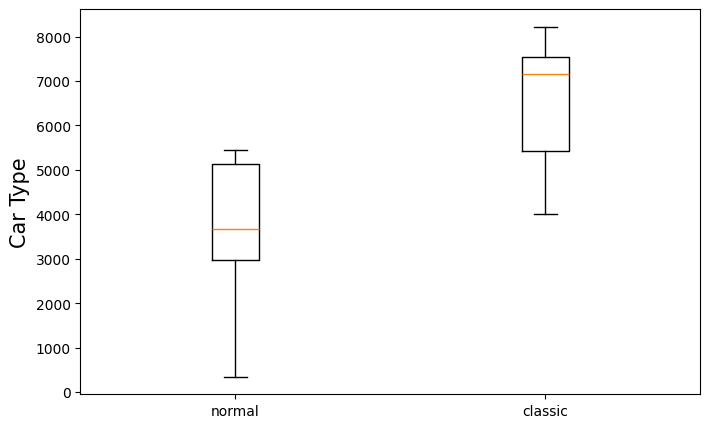

In [20]:
ice = pdp_ice['individual'][0]

normal_ice = [i[0] for i in ice]
classic_ice = [i[1] for i in ice]
data = [normal_ice, classic_ice]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=labels)

plt.ylabel('Partial Pred', size=15)
plt.ylabel('Car Type', size=15)

plt.show()

### Binary Target

In [21]:
avg = np.mean(y)
y_bin = [1 if yi > avg else 0 for yi in y]

model_xgb = xgb.XGBClassifier(objective='binary:logistic', max_depth=2, n_estimators=100)
model_xgb.fit(X, y_bin)

preds_xgb = model_xgb.predict(X)

print(confusion_matrix(y_bin, preds_xgb))
accuracy_score(y_bin, preds_xgb)

[[497  14]
 [  7 482]]


0.979

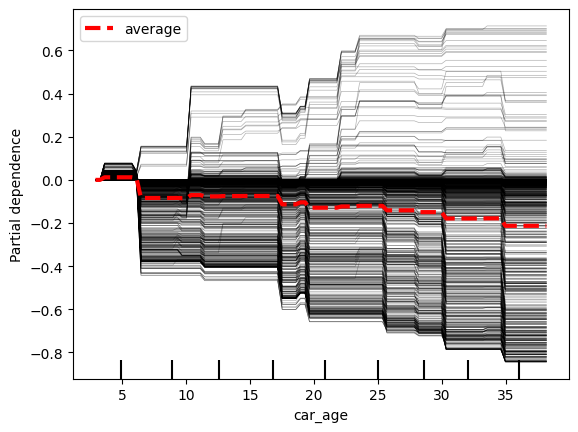

In [22]:
features = ['car_age']
PartialDependenceDisplay.from_estimator(
    model_xgb,
    X,
    features,
    kind='both',
    centered=True,
    ice_lines_kw={'color':'black'},
    pd_line_kw={'color':'red', 'lw':3, 'linestyle':'--'}
)